Ice melting by freshwater  

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
# problem parameters
H = 1000 # m, domain size
kappa = 1.3e-7 # m^2/s, thermal diffusivity
tkappa = H**2/kappa # s, diffusive time scale
Tf = 0 # degC, freezing temp
TB = 2 # degC, bottom temp
L = 334e3 # J/kg, latent heat of fusion
cp = 4180 # J/K/kg, specific heat capacity 
S = L/(cp*(TB-Tf)) # Stefan number
print('The Stefan number is %1.3f'%S)

The Stefan number is 39.952


Similarity solution obtained assuming a semi-infinite domain  
Step 1: find lambda parameter

In [3]:
# solution for large S
lamb_guess = 1/np.sqrt(2*S)
# exact solution
from scipy import special
from scipy.optimize import fsolve
def func(x):  
    res = np.sqrt(np.pi)*x*np.exp(x**2)*special.erf(x)-1/S
    return res
lamb = fsolve(func, lamb_guess)[0]
print(lamb_guess,lamb)

0.11187032698566785 0.1114080662303478


Step 2: plot time history of h(t)

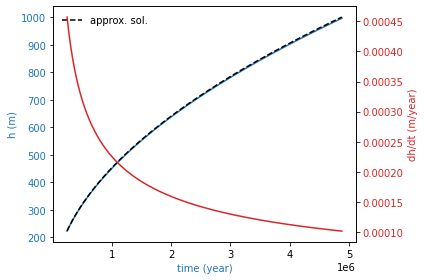

In [4]:
t = np.linspace(tkappa,20*tkappa,300)
h = lamb*2*np.sqrt(kappa*t)
dhdt = lamb*np.sqrt(kappa/t)
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.plot(t/(3600*24*365),h, color=color)
ax1.plot(t/(3600*24*365),np.sqrt(2*kappa*t/S), '--k', label=r'approx. sol.')
ax1.set_xlabel('time (year)', color=color)
ax1.set_ylabel('h (m)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.plot(t/(3600*24*365), dhdt*(3600*24*365), color=color)
ax2.set_ylabel('dh/dt (m/year)', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
ax1.legend(frameon=False)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Step 3: plot vertical temperature profiles

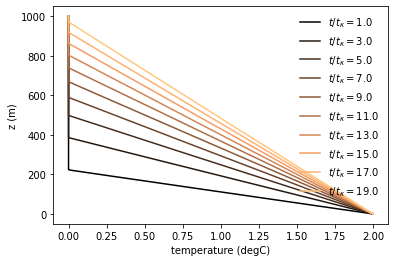

In [5]:
# explicit solution as a function of (z,t)
def temperature(z,t):
    eta = z/(2*np.sqrt(kappa*t))
    T = TB + (Tf-TB)*special.erf(eta)/special.erf(lamb)
    return T*(eta<=lamb)
z = np.linspace(0,H,300)
time = np.linspace(tkappa,19*tkappa,10)
fig, ax = plt.subplots()
ax.set_prop_cycle('color',[plt.cm.copper(i) for i in np.linspace(0, 1, len(time))])
for i,t in enumerate(time):
    plt.plot(temperature(z,t),z,label='$t/t_{\kappa} = %1.1f$'%(t/tkappa))
ax.legend(frameon=False)
plt.xlabel('temperature (degC)')
plt.ylabel('z (m)')
plt.show()